In [44]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
pd.options.mode.chained_assignment = None
filterwarnings(action='ignore')

In [3]:
df_train = pd.read_csv('datasets/train.csv')
X_test = pd.read_csv('datasets/test.csv')
y_test = pd.read_csv('datasets/gender_submission.csv')


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Calculate the number of missing values for each columns:


In [7]:
missing_values = pd.DataFrame()
missing_values['Number of missin values']= df_train.isna().sum().sort_values(ascending=False)
missing_values['Percentage'] = (missing_values['Number of missin values'] / len(df_train['PassengerId']))*100
missing_values

,Number of missin values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [8]:
def get_the_title(df):
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    return df

def get_family_size(df):
    df['Family size'] = df['SibSp'] + df['Parch'] + 1
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket', 'Parch','SibSp', 'Cabin'], axis=1, inplace=True)
    return df


In [9]:
# Train set
get_the_title(df_train)
get_family_size(df_train)
drop_features(df_train)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family size
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Rev,1
887,1,1,female,19.0,30.0000,S,Miss,1
888,0,3,female,NaN,23.4500,S,Miss,4
889,1,1,male,26.0,30.0000,C,Mr,1


In [10]:
#X_test
get_the_title(X_test)
get_family_size(X_test)
drop_features(X_test)

,Pclass,Sex,Age,Fare,Embarked,Title,Family size
0,3,male,34.5,7.8292,Q,Mr,1
1,3,female,47.0,7.0000,S,Mrs,2
2,2,male,62.0,9.6875,Q,Mr,1
3,3,male,27.0,8.6625,S,Mr,1
4,3,female,22.0,12.2875,S,Mrs,3
...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,Mr,1
414,1,female,39.0,108.9000,C,Dona,1
415,3,male,38.5,7.2500,S,Mr,1
416,3,male,NaN,8.0500,S,Mr,1


In [11]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

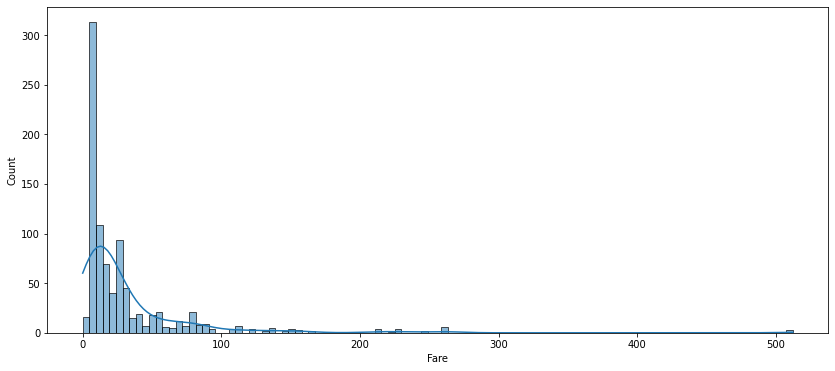

In [12]:
plt.figure(figsize=(14,6))
sns.histplot(df_train['Fare'], kde=True)

plt.show()

In [13]:
#As a lot of Fare values are missed, I will drop it from the dataset.
df_train.drop('Fare', axis=1, inplace=True)

In [14]:
X_test.drop(['Fare'], axis=1, inplace=True)

### Missing Values Imputation

In [15]:
df_train.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
Survived         0
Pclass           0
Sex              0
Title            0
Family size      0
dtype: int64

In [16]:
# drop two rows that missed Embarked Values
df_train.dropna(subset=['Embarked'], inplace=True)

In [17]:
X_test.isna().sum()

Pclass          0
Sex             0
Age            86
Embarked        0
Title           0
Family size     0
dtype: int64

In [18]:
# Using titles to impute age missing values for the trainset

title_age = df_train.groupby('Title')['Age'].mean()

title_age = title_age.to_dict()

In [19]:
indexes = df_train.loc[df_train['Age'].isna()].index

for index in indexes:
    for key in title_age.keys():
        if df_train['Title'][index] == key:
            df_train['Age'][index] = title_age[key]



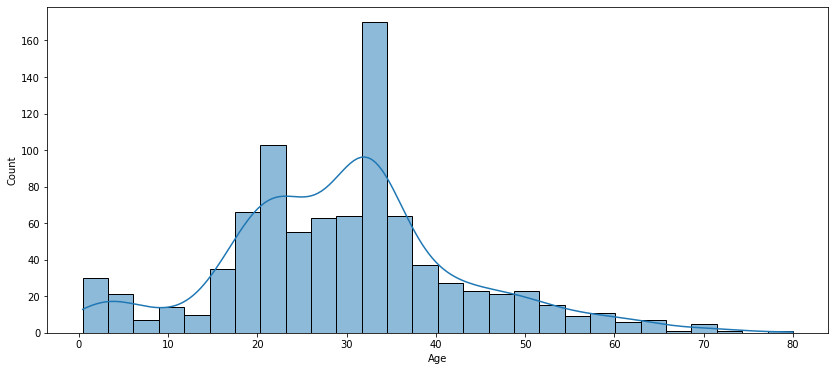

In [20]:
plt.figure(figsize=(14,6))
sns.histplot(df_train['Age'], kde=True)

plt.show()

In [21]:
# The title is only used to impute age, so now we can delete it
df_train.drop('Title', axis=1, inplace=True)

In [22]:
# Using titles to impute age missing values for the testset

title_age = X_test.groupby('Title')['Age'].mean()

title_age = title_age.to_dict()

In [23]:
title_age

{'Col': 50.0,
 'Dona': 39.0,
 'Dr': 53.0,
 'Master': 7.406470588235294,
 'Miss': 21.77484375,
 'Mr': 32.0,
 'Mrs': 38.903225806451616,
 'Ms': nan,
 'Rev': 35.5}

In [24]:
title_age['Ms'] = 28

In [25]:
indexes = X_test.loc[X_test['Age'].isna()].index

for index in indexes:
    for key in title_age.keys():
        if X_test['Title'][index] == key:
            X_test['Age'][index] = title_age[key]

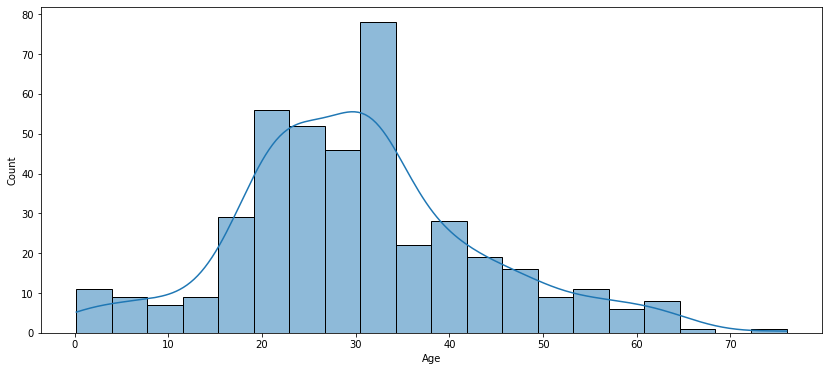

In [26]:
plt.figure(figsize=(14,6))
sns.histplot(X_test['Age'], kde=True)

plt.show()

In [27]:
X_test.isna().sum()

Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
Family size    0
dtype: int64

In [28]:
# The title is only used to impute age, so now we can delete it (testset)
X_test.drop('Title', axis=1, inplace=True)

In [29]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train

,Survived,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,2,1,0,1
1,1,1,38.000000,2,0,0,0
2,1,3,26.000000,1,0,0,1
3,1,1,35.000000,2,0,0,1
4,0,3,35.000000,1,1,0,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,1,1,0,1
887,1,1,19.000000,1,0,0,1
888,0,3,21.662069,4,0,0,1
889,1,1,26.000000,1,1,0,0


In [30]:
X_test = pd.get_dummies(X_test, drop_first=True)
X_test

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
0,3,34.500000,1,1,1,0
1,3,47.000000,2,0,0,1
2,2,62.000000,1,1,1,0
3,3,27.000000,1,1,0,1
4,3,22.000000,3,0,0,1
...,...,...,...,...,...,...
413,3,32.000000,1,1,0,1
414,1,39.000000,1,0,0,0
415,3,38.500000,1,1,0,1
416,3,32.000000,1,1,0,1


In [31]:
X_test.isna().sum()

Pclass         0
Age            0
Family size    0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [32]:
X_test.dropna(subset=['Age'], inplace=True)

### Spliting the data into train and validation

In [33]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
708,1,22.000000,1,0,0,1
240,3,21.662069,2,0,0,0
382,3,32.000000,1,1,0,1
792,3,21.662069,11,0,0,1
683,3,14.000000,8,1,0,1
...,...,...,...,...,...,...
107,3,32.368090,1,1,0,1
271,3,25.000000,1,1,0,1
862,1,48.000000,1,0,0,1
436,3,21.000000,5,0,0,1


### Model Training

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
print(rf_clf.__class__.__name__, accuracy_score(y_val, rf_clf.predict(X_val)))

RandomForestClassifier 0.8146067415730337


In [38]:
y_pred = rf_clf.predict(X_test)

### Save the Model

In [41]:
import pickle

In [48]:
pickle.dump(rf_clf, open("model.pkl", 'wb'))

In [47]:
X_train

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
708,1,22.000000,1,0,0,1
240,3,21.662069,2,0,0,0
382,3,32.000000,1,1,0,1
792,3,21.662069,11,0,0,1
683,3,14.000000,8,1,0,1
...,...,...,...,...,...,...
107,3,32.368090,1,1,0,1
271,3,25.000000,1,1,0,1
862,1,48.000000,1,0,0,1
436,3,21.000000,5,0,0,1
